In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

folder_path = os.path.join('project_data', 'stocks')
krbn_plots = os.path.join('plots', 'krbn')

ticker = "KRBN"
print(f"Downloading {ticker}...")

try:
    krbn = yf.download(ticker, period="max", progress=False)

    print(f"Downloaded {len(krbn)} records from {krbn.index[0].date()} to {krbn.index[-1].date()}")

    file_path = os.path.join(folder_path, f'{ticker}_data.csv')
    krbn.to_csv(file_path)

except Exception as e:
    print(f"Error: {e}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\1996660401.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  krbn = yf.download(ticker, period="max", progress=False)


Downloaded 1237 records from 2020-07-31 to 2025-07-03


In [2]:
print(f"Columns: {list(krbn.columns)}")
print(f"Shape: {krbn.shape}")

Columns: [('Close', 'KRBN'), ('High', 'KRBN'), ('Low', 'KRBN'), ('Open', 'KRBN'), ('Volume', 'KRBN')]
Shape: (1237, 5)


In [3]:
print("First 5 rows:")
print(krbn.head())

print("\nLast 5 rows:")
print(krbn.tail())

print("\nMissing values:")
print(krbn.isnull().sum())

price_col = "Close"

print(f"\nPrice statistics:")
print(krbn[price_col].describe())

First 5 rows:
Price           Close       High        Low       Open Volume
Ticker           KRBN       KRBN       KRBN       KRBN   KRBN
Date                                                         
2020-07-31  14.327861  14.476282  14.327861  14.476282   9900
2020-08-03  14.388354  14.388354  14.244154  14.244154   5100
2020-08-04  14.556471  14.645101  14.279325  14.349666   1600
2020-08-05  14.652134  14.701373  14.560691  14.560691  11000
2020-08-06  14.460102  14.785784  14.420008  14.778750   2900

Last 5 rows:
Price           Close       High        Low       Open Volume
Ticker           KRBN       KRBN       KRBN       KRBN   KRBN
Date                                                         
2025-06-27  30.170000  30.209999  29.973000  30.209999  18400
2025-06-30  29.690001  29.771000  29.530001  29.700001  21100
2025-07-01  30.100000  30.150000  29.900000  29.990000  11700
2025-07-02  30.379999  30.650000  30.219999  30.219999  40100
2025-07-03  30.480000  30.686001  30.45999

Plot saved to plots\krbn\KRBN_price_plot.png


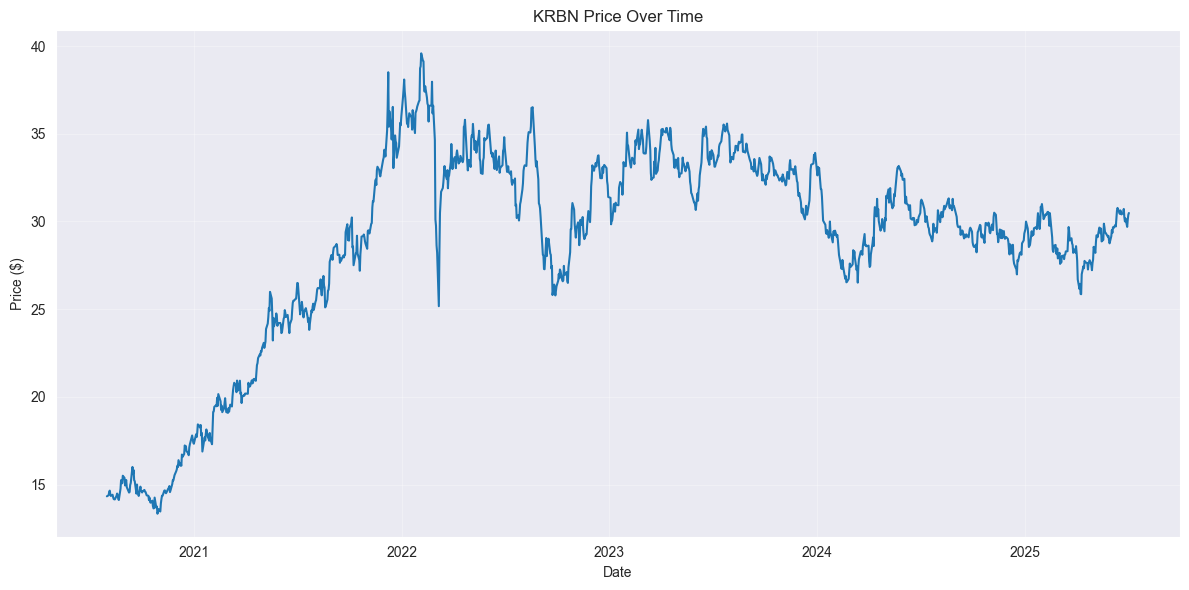

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(krbn.index, krbn[price_col])
plt.title(f'{ticker} Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, f'{ticker}_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Volume plot saved to plots\krbn\KRBN_volume_plot.png


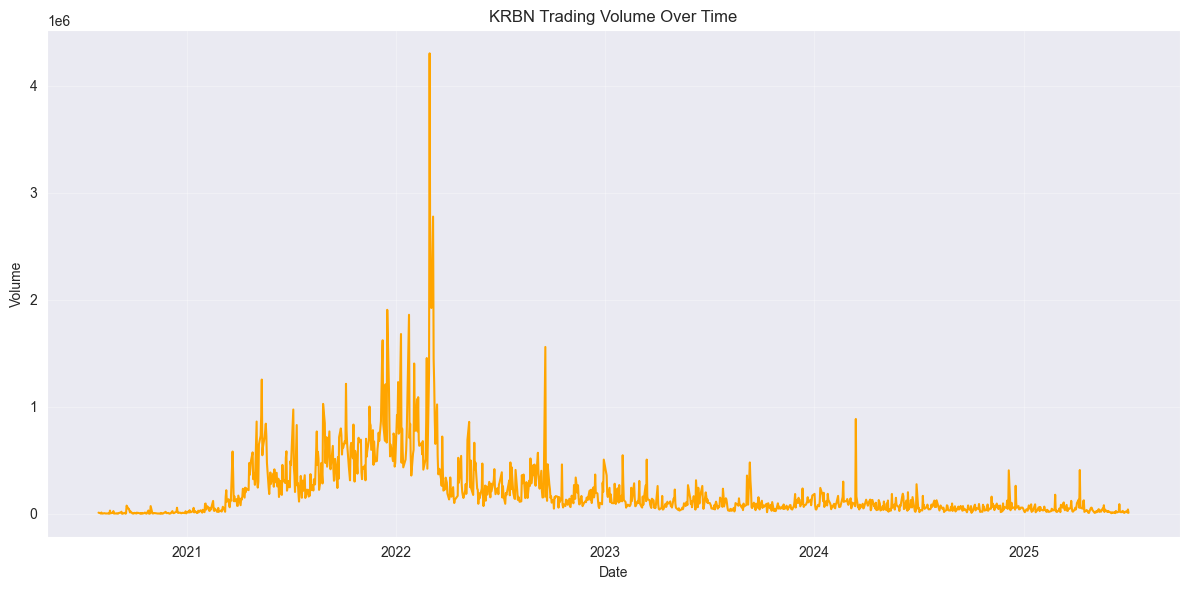

In [5]:
volume_col = 'Volume'

plt.figure(figsize=(12, 6))
plt.plot(krbn.index, krbn[volume_col], color='orange')
plt.title(f'KRBN Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, f'KRBN_volume_plot.png')
plt.savefig(plot_path)
print(f"Volume plot saved to {plot_path}")

plt.show()

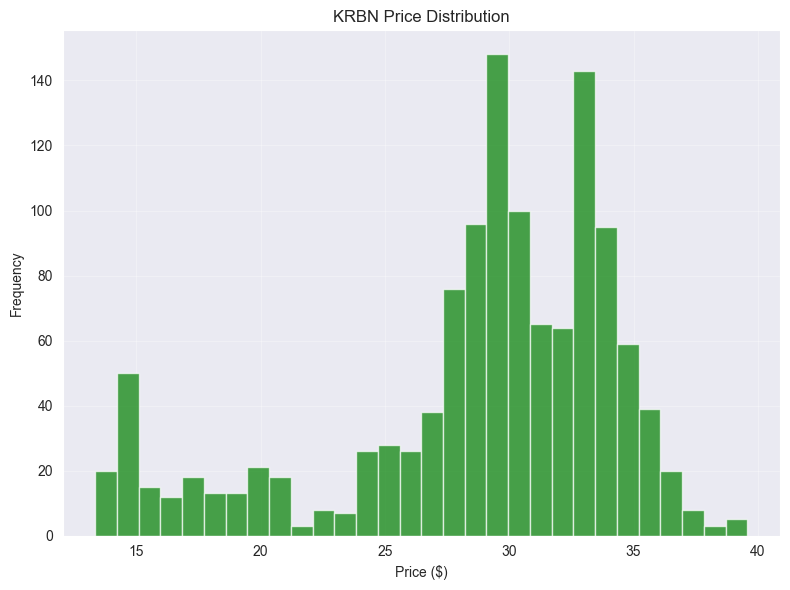

In [6]:
plt.figure(figsize=(8, 6))
plt.hist(krbn[price_col], bins=30, alpha=0.7, color='green')
plt.title(f'{ticker} Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Plot saved to plots\krbn\KRBN_daily_price_range.png


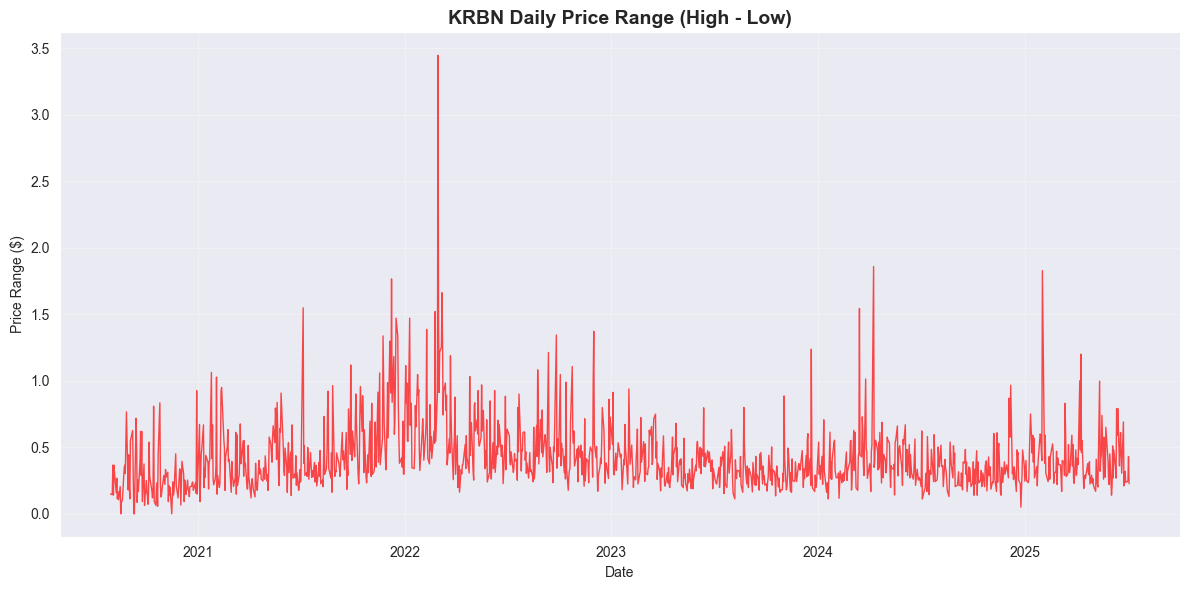

In [7]:
krbn_daily_range = krbn['High'] - krbn['Low']

plt.figure(figsize=(12, 6))

plt.plot(krbn.index, krbn_daily_range, linewidth=1, color='red', alpha=0.7)
plt.title('KRBN Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price Range ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_daily_price_range.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [9]:
daily_returns = krbn[price_col].pct_change().dropna()
annual_volatility = daily_returns.std() * np.sqrt(252)

print(f"KRBN annual volatility: {annual_volatility['KRBN']:.1%}")

KRBN annual volatility: 30.1%


In [10]:
avg_daily_change = abs(daily_returns).mean()
print(f"Average daily price movement: {avg_daily_change['KRBN']:.2%}")

Average daily price movement: 1.37%


In [11]:
print("Downloading commodity and alternative benchmarks...")

benchmark_indices = ["GLD", "DBA", "USO", "TLT"]

gld = yf.download(benchmark_indices[0], period="max", progress=False)  # Gold
dba = yf.download(benchmark_indices[1], period="max", progress=False)  # Agriculture
uso = yf.download(benchmark_indices[2], period="max", progress=False)  # Oil
tlt = yf.download(benchmark_indices[3], period="max", progress=False)  # Long-term bonds

for ticker_new, data in [("GLD", gld), ("DBA", dba), ("USO", uso), ("TLT", tlt)]:
    data.to_csv(os.path.join(folder_path, f'{ticker_new}_data.csv'))
    print(f"{ticker_new}: {len(data)} records from {data.index[0].date()} to {data.index[-1].date()}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3569284122.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gld = yf.download(benchmark_indices[0], period="max", progress=False)  # Gold
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3569284122.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dba = yf.download(benchmark_indices[1], period="max", progress=False)  # Agriculture
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3569284122.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  uso = yf.download(benchmark_indices[2], period="max", progress=False)  # Oil
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3569284122.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tlt = yf.download(benchmark_indices[3], period="max", progress=False)  # Long-term bonds


GLD: 5188 records from 2004-11-18 to 2025-07-03
DBA: 4653 records from 2007-01-05 to 2025-07-03
USO: 4839 records from 2006-04-10 to 2025-07-03
TLT: 5770 records from 2002-07-30 to 2025-07-03


In [14]:
common_start = max(krbn.index[0], gld.index[0], dba.index[0], uso.index[0], tlt.index[0])
common_end = min(krbn.index[-1], gld.index[-1], dba.index[-1], uso.index[-1], tlt.index[-1])

print(f"Comparing over common period: {common_start.date()} to {common_end.date()}")

krbn_common = krbn[common_start:common_end]
gld_common = gld[common_start:common_end]
dba_common = dba[common_start:common_end]
uso_common = uso[common_start:common_end]
tlt_common = tlt[common_start:common_end]

krbn_returns = krbn_common[price_col].pct_change().dropna()
gld_returns = gld_common[price_col].pct_change().dropna()
dba_returns = dba_common[price_col].pct_change().dropna()
uso_returns = uso_common[price_col].pct_change().dropna()
tlt_returns = tlt_common[price_col].pct_change().dropna()

krbn_vol = krbn_returns.std() * np.sqrt(252)
gld_vol = gld_returns.std() * np.sqrt(252)
dba_vol = dba_returns.std() * np.sqrt(252)
uso_vol = uso_returns.std() * np.sqrt(252)
tlt_vol = tlt_returns.std() * np.sqrt(252)

krbn_daily = abs(krbn_returns).mean()
gld_daily = abs(gld_returns).mean()
dba_daily = abs(dba_returns).mean()
uso_daily = abs(uso_returns).mean()
tlt_daily = abs(tlt_returns).mean()

print(f"Period: {len(krbn_returns)} trading days")
print()
print("Annual Volatility:")
print(f"KRBN (Carbon Allowances):     {krbn_vol['KRBN']:.2%}")
print(f"GLD (Gold):                   {gld_vol['GLD']:.2%}")
print(f"DBA (Agriculture):            {dba_vol['DBA']:.2%}")
print(f"USO (Oil):                    {uso_vol['USO']:.2%}")
print(f"TLT (Long Bonds):             {tlt_vol['TLT']:.2%}")
print()
print("Average Daily Movement:")
print(f"KRBN:  {krbn_daily['KRBN']:.2%}")
print(f"GLD:   {gld_daily['GLD']:.2%}")
print(f"DBA:   {dba_daily['DBA']:.2%}")
print(f"USO:   {uso_daily['USO']:.2%}")
print(f"TLT:   {tlt_daily['TLT']:.2%}")
print()
print(f"KRBN vs GLD: {krbn_vol['KRBN']/gld_vol['GLD']:.2f}x the volatility")
print(f"KRBN vs DBA: {krbn_vol['KRBN']/dba_vol['DBA']:.2f}x the volatility")
print(f"KRBN vs USO: {krbn_vol['KRBN']/uso_vol['USO']:.2f}x the volatility")

Comparing over common period: 2020-07-31 to 2025-07-03
Period: 1236 trading days

Annual Volatility:
KRBN (Carbon Allowances):     30.06%
GLD (Gold):                   15.45%
DBA (Agriculture):            14.40%
USO (Oil):                    33.84%
TLT (Long Bonds):             16.28%

Average Daily Movement:
KRBN:  1.37%
GLD:   0.73%
DBA:   0.69%
USO:   1.61%
TLT:   0.81%

KRBN vs GLD: 1.95x the volatility
KRBN vs DBA: 2.09x the volatility
KRBN vs USO: 0.89x the volatility


30% annual volatility is quite high. Higher than traditional "safe haven" assets (gold, bonds). Though, still comparable to many other stocks.

Plot saved to plots\krbn\carbon_comparison_price_plot.png


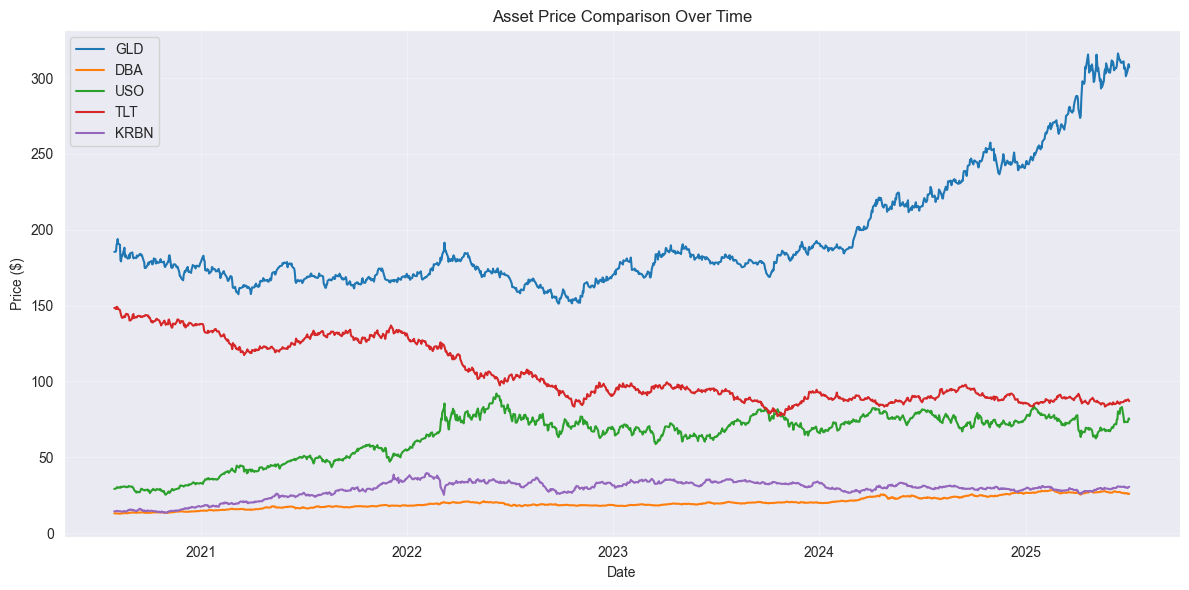

In [15]:
plt.figure(figsize=(12, 6))

plt.plot(gld_common.index, gld_common[price_col], label="GLD")
plt.plot(dba_common.index, dba_common[price_col], label="DBA")
plt.plot(uso_common.index, uso_common[price_col], label="USO")
plt.plot(tlt_common.index, tlt_common[price_col], label="TLT")
plt.plot(krbn.index, krbn[price_col], label=ticker)

plt.title("Asset Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'carbon_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\normalized_carbon_comparison_price_plot.png


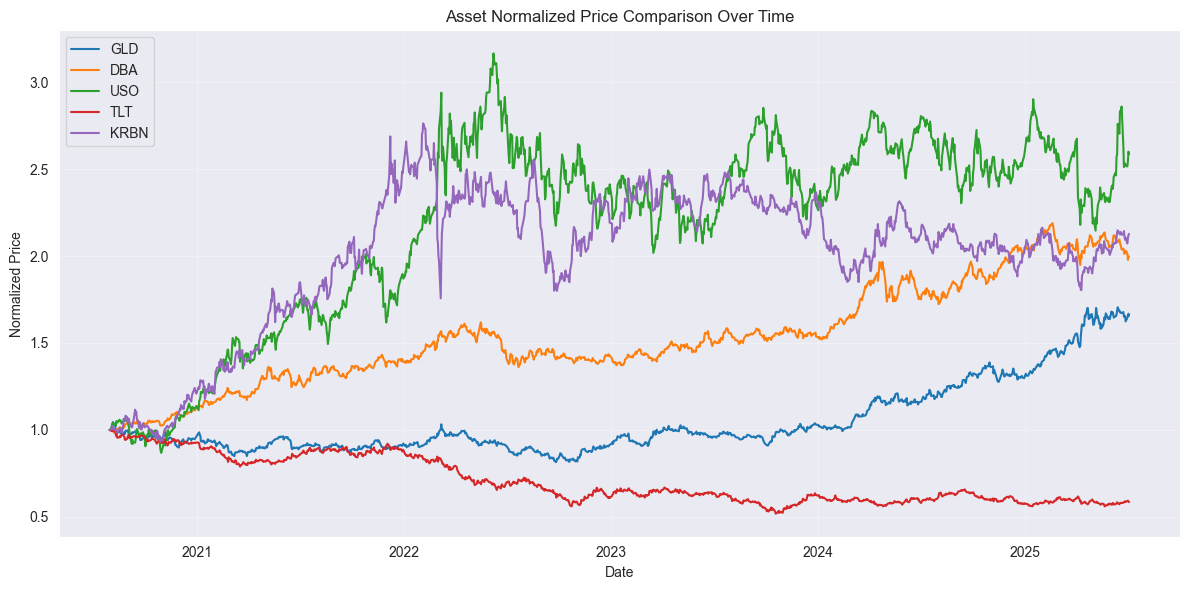

In [16]:
gld_norm = gld_common[price_col] / gld_common[price_col].iloc[0]
dba_norm = dba_common[price_col] / dba_common[price_col].iloc[0]
uso_norm = uso_common[price_col] / uso_common[price_col].iloc[0]
tlt_norm = tlt_common[price_col] / tlt_common[price_col].iloc[0]
krbn_norm = krbn[price_col] / krbn[price_col].iloc[0]

plt.figure(figsize=(12, 6))

plt.plot(gld_common.index, gld_norm, label="GLD")
plt.plot(dba_common.index, dba_norm, label="DBA")
plt.plot(uso_common.index, uso_norm, label="USO")
plt.plot(tlt_common.index, tlt_norm, label="TLT")
plt.plot(krbn_common.index, krbn_norm, label=ticker)

plt.title("Asset Normalized Price Comparison Over Time")
plt.xlabel('Date')
plt.ylabel('Normalized Price')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'normalized_carbon_comparison_price_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

The opposite mirroring between KRBN and USO looks interesting. Potentially, it could reflect substitution dynamics: when oil prices rise, there's more incentive to switch to renewables. Maybe this is the spillover effect that Saulius was talking about?

In [17]:
spy = yf.download("SPY", period="max", progress=False)  # S&P 500
agg = yf.download("AGG", period="max", progress=False)  # Total Bond Market

for ticker_new, data in [("SPY", spy), ("AGG", agg)]:
    data.to_csv(os.path.join(folder_path, f'{ticker_new}_data.csv'))
    print(f"{ticker_new}: {len(data)} records from {data.index[0].date()} to {data.index[-1].date()}")

C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3781778841.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download("SPY", period="max", progress=False)  # S&P 500
C:\Users\Mykhailo\AppData\Local\Temp\ipykernel_12796\3781778841.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  agg = yf.download("AGG", period="max", progress=False)  # Total Bond Market


SPY: 8163 records from 1993-01-29 to 2025-07-03
AGG: 5476 records from 2003-09-29 to 2025-07-03


In [18]:
common_start_all = max(krbn.index[0], spy.index[0], agg.index[0], gld.index[0], uso.index[0])
common_end_all = min(krbn.index[-1], spy.index[-1], agg.index[-1], gld.index[-1], uso.index[-1])

asset_data = {}
for name, df in [("KRBN", krbn), ("SPY", spy), ("AGG", agg), ("GLD", gld), ("USO", uso)]:
    asset_data[name] = df[common_start_all:common_end_all][price_col]

asset_prices = pd.concat(asset_data.values(), axis=1)
asset_prices.columns = asset_data.keys()

print(f"Analysis period: {common_start_all.date()} to {common_end_all.date()}")
print(f"Total observations: {len(asset_prices)}")

Analysis period: 2020-07-31 to 2025-07-03
Total observations: 1237


Plot saved to plots\krbn\carbon_vs_traditional_assets_plot.png


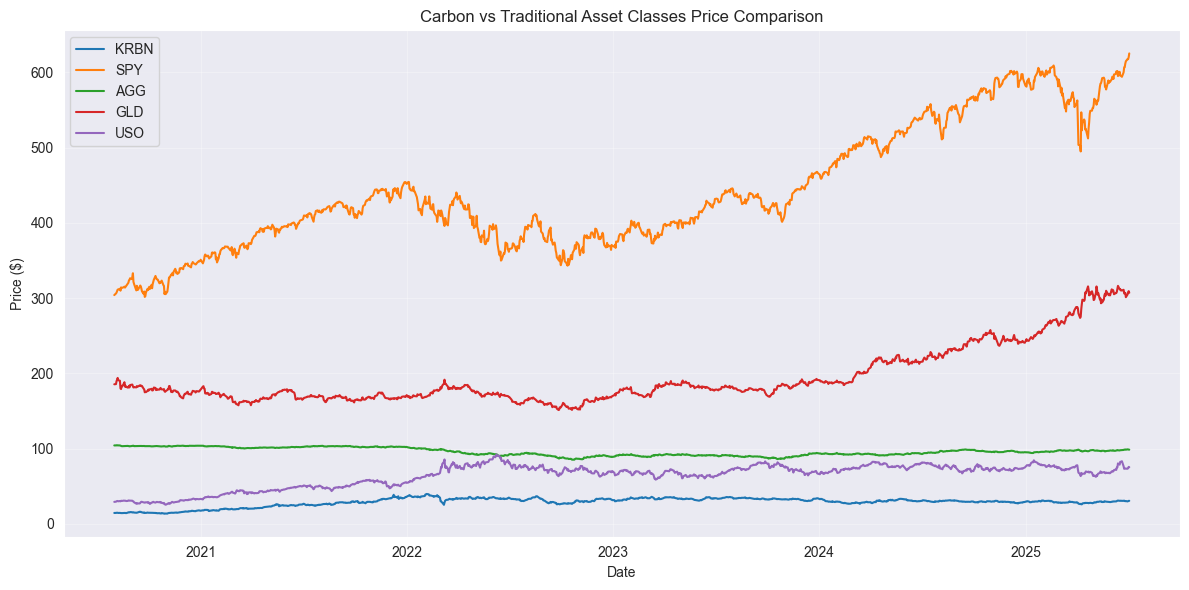

In [19]:
plt.figure(figsize=(12, 6))

plt.plot(asset_prices.index, asset_prices['KRBN'], label='KRBN')
plt.plot(asset_prices.index, asset_prices['SPY'], label='SPY')
plt.plot(asset_prices.index, asset_prices['AGG'], label='AGG')
plt.plot(asset_prices.index, asset_prices['GLD'], label='GLD')
plt.plot(asset_prices.index, asset_prices['USO'], label='USO')

plt.title("Carbon vs Traditional Asset Classes Price Comparison")
plt.xlabel('Date')
plt.ylabel('Price ($)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'carbon_vs_traditional_assets_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\normalized_carbon_vs_traditional_assets_plot.png


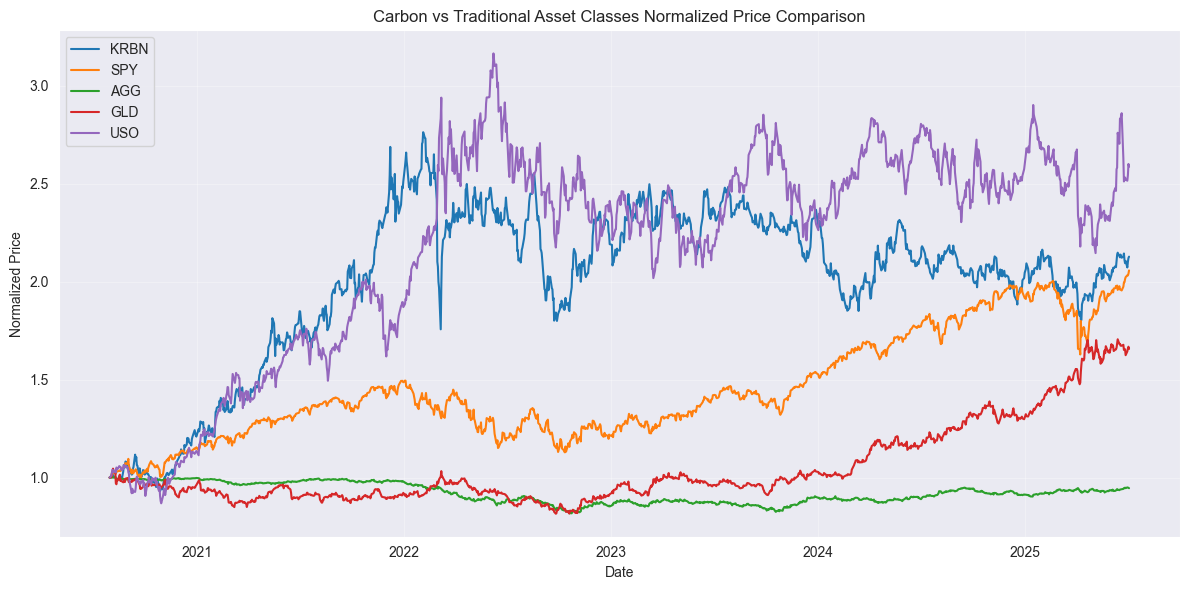

In [20]:
asset_norm = asset_prices / asset_prices.iloc[0]

plt.figure(figsize=(12, 6))

plt.plot(asset_norm.index, asset_norm['KRBN'], label='KRBN')
plt.plot(asset_norm.index, asset_norm['SPY'], label='SPY')
plt.plot(asset_norm.index, asset_norm['AGG'], label='AGG')
plt.plot(asset_norm.index, asset_norm['GLD'], label='GLD')
plt.plot(asset_norm.index, asset_norm['USO'], label='USO')

plt.title("Carbon vs Traditional Asset Classes Normalized Price Comparison")
plt.xlabel('Date')
plt.ylabel('Normalized Price')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'normalized_carbon_vs_traditional_assets_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\carbon_vs_assets_daily_returns_comparison_plot.png


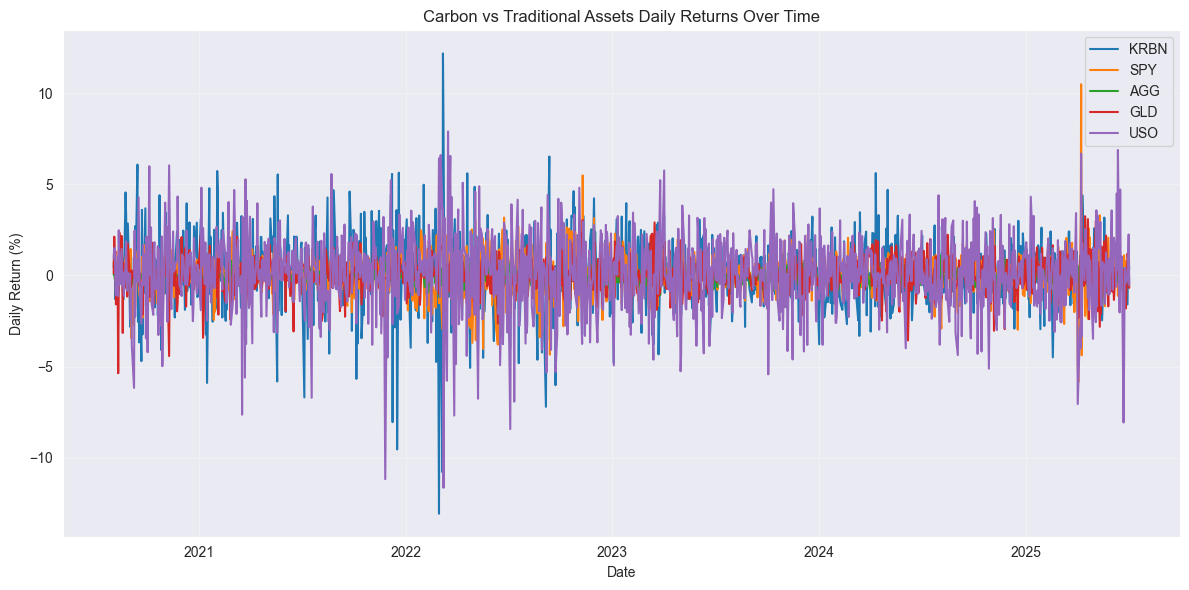

In [21]:
asset_returns = asset_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(asset_returns.index, asset_returns['KRBN'], label='KRBN')
plt.plot(asset_returns.index, asset_returns['SPY'], label='SPY')
plt.plot(asset_returns.index, asset_returns['AGG'], label='AGG')
plt.plot(asset_returns.index, asset_returns['GLD'], label='GLD')
plt.plot(asset_returns.index, asset_returns['USO'], label='USO')

plt.title("Carbon vs Traditional Assets Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'carbon_vs_assets_daily_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\KRBN_SPY_daily_returns_comparison_plot.png


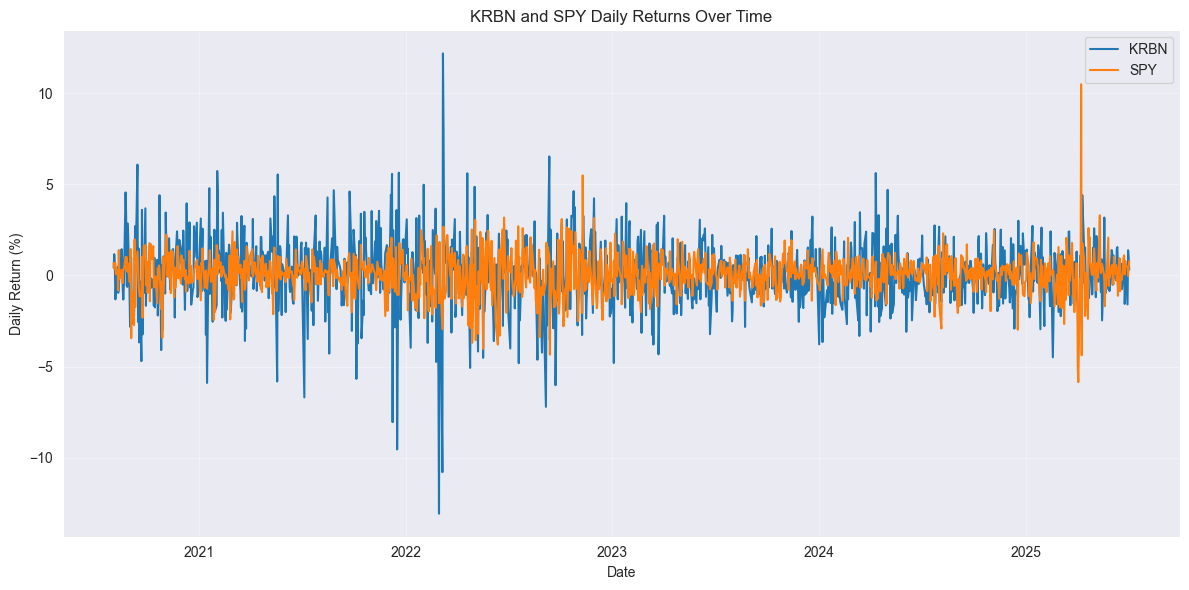

In [22]:
plt.figure(figsize=(12, 6))

plt.plot(asset_returns.index, asset_returns['KRBN'], label='KRBN')
plt.plot(asset_returns.index, asset_returns['SPY'], label='SPY')

plt.title("KRBN and SPY Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_SPY_daily_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\KRBN_daily_returns_plot.png


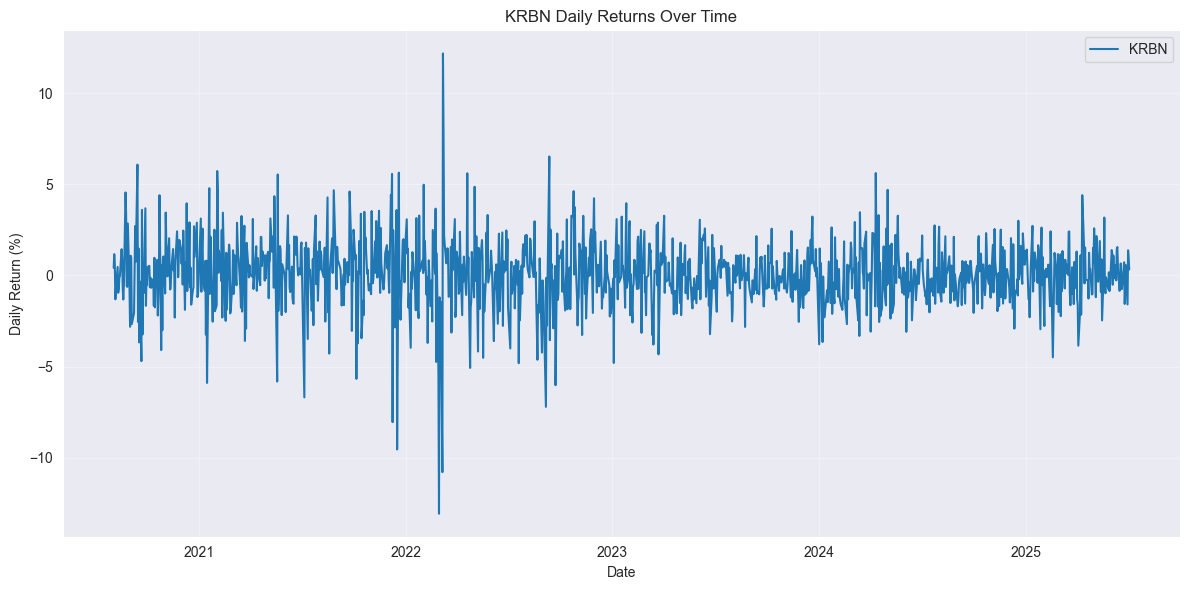

In [23]:
plt.figure(figsize=(12, 6))

plt.plot(asset_returns.index, asset_returns['KRBN'], label='KRBN')

plt.title("KRBN Daily Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_daily_returns_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\KRBN_rolling_volatility_plot.png


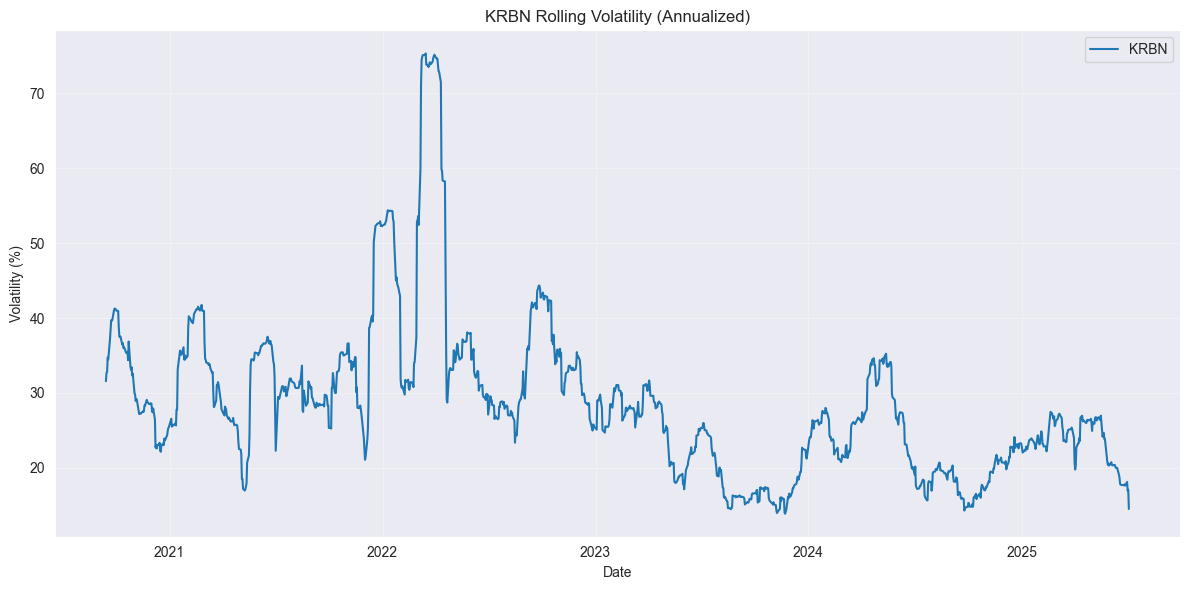

In [24]:
plt.figure(figsize=(12, 6))

plt.plot(asset_returns.index, asset_returns['KRBN'].rolling(window=30).std() * np.sqrt(252), label='KRBN')

plt.title("KRBN Rolling Volatility (Annualized)")
plt.xlabel('Date')
plt.ylabel('Volatility (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'KRBN_rolling_volatility_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

Plot saved to plots\krbn\carbon_vs_assets_weekly_returns_comparison_plot.png


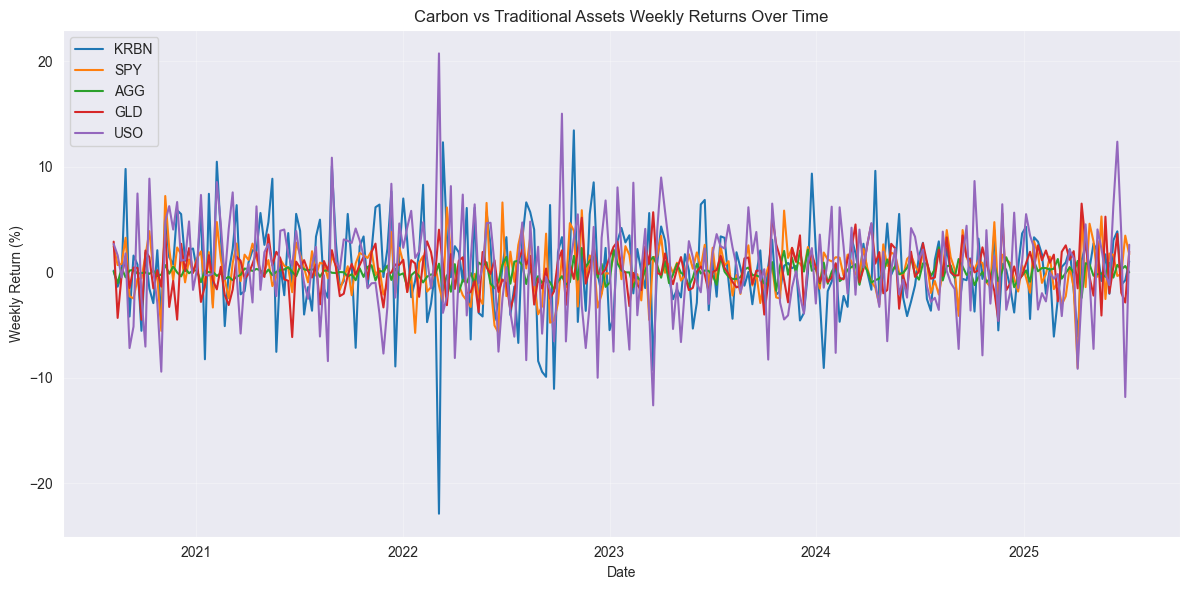

In [25]:
weekly_asset_prices = asset_prices.resample('W').last()
asset_log_returns = weekly_asset_prices.pct_change().dropna() * 100

plt.figure(figsize=(12, 6))

plt.plot(asset_log_returns.index, asset_log_returns['KRBN'], label='KRBN')
plt.plot(asset_log_returns.index, asset_log_returns['SPY'], label='SPY')
plt.plot(asset_log_returns.index, asset_log_returns['AGG'], label='AGG')
plt.plot(asset_log_returns.index, asset_log_returns['GLD'], label='GLD')
plt.plot(asset_log_returns.index, asset_log_returns['USO'], label='USO')

plt.title("Carbon vs Traditional Assets Weekly Returns Over Time")
plt.xlabel('Date')
plt.ylabel('Weekly Return (%)')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plot_path = os.path.join(krbn_plots, 'carbon_vs_assets_weekly_returns_comparison_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

In [26]:
correlation_matrix = asset_returns.corr()

print(correlation_matrix.round(3))

       KRBN    SPY    AGG    GLD    USO
KRBN  1.000  0.220  0.019  0.108  0.114
SPY   0.220  1.000  0.193  0.140  0.211
AGG   0.019  0.193  1.000  0.341 -0.094
GLD   0.108  0.140  0.341  1.000  0.197
USO   0.114  0.211 -0.094  0.197  1.000


Plot saved to plots\krbn\carbon_assets_correlation_matrix.png


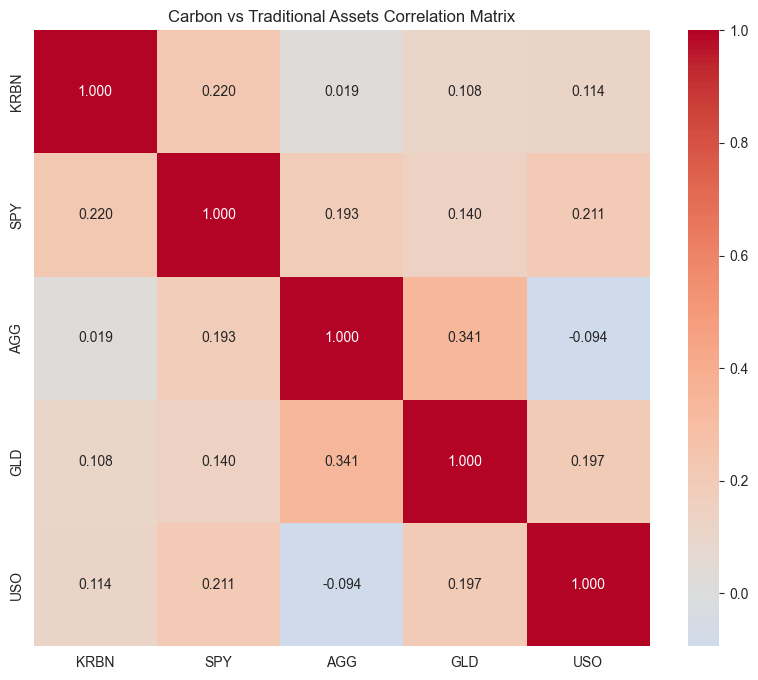

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Carbon vs Traditional Assets Correlation Matrix')

plot_path = os.path.join(krbn_plots, 'carbon_assets_correlation_matrix.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()

A correlation is extremely low. If the comparison to other commodites made sense then it actually means that KRBN provides amazing diversification potential.

Plot saved to plots\krbn\carbon_rolling_correlation_plot.png


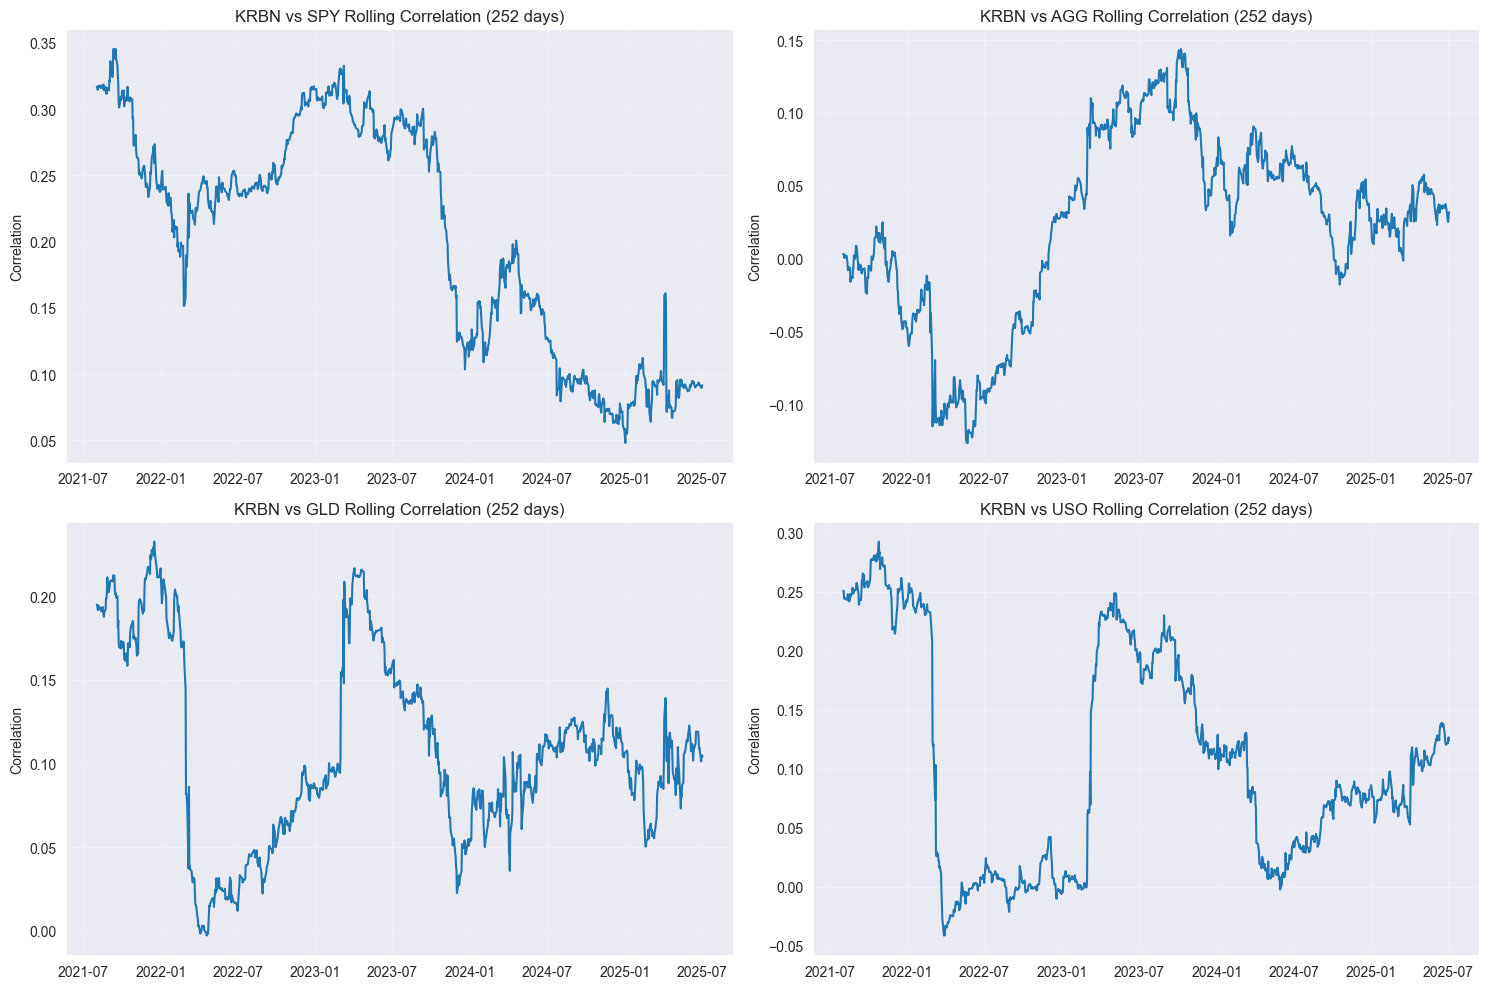

In [29]:
window = 252
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

benchmarks = ['SPY', 'AGG', 'GLD', 'USO']
for i, benchmark in enumerate(benchmarks):
    row, col = i // 2, i % 2
    rolling_corr = asset_returns['KRBN'].rolling(window).corr(asset_returns[benchmark])
    axes[row, col].plot(rolling_corr.index, rolling_corr.values)
    axes[row, col].set_title(f'KRBN vs {benchmark} Rolling Correlation ({window} days)')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_ylabel('Correlation')

plot_path = os.path.join(krbn_plots, 'carbon_rolling_correlation_plot.png')
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.tight_layout()
plt.show()

In [30]:
results = {}

for asset in asset_returns.columns:
    returns = asset_returns[asset]
    results[asset] = {
        'Annual_Volatility': returns.std() * np.sqrt(252),
        'Daily_Volatility': returns.std(),
        'Annual_Return': returns.mean() * 252,
        'Sharpe_Ratio': (returns.mean() / returns.std()) * np.sqrt(252),
        'Skewness': stats.skew(returns),
        'Kurtosis': stats.kurtosis(returns),
        'VaR_5%': returns.quantile(0.05),
        'CVaR_5%': returns[returns <= returns.quantile(0.05)].mean(),
        'Max_Drawdown': (returns.cumsum() - returns.cumsum().expanding().max()).min()
    }

pd.DataFrame(results).T

,Annual_Volatility,Daily_Volatility,Annual_Return,Sharpe_Ratio,Skewness,Kurtosis,VaR_5%,CVaR_5%,Max_Drawdown
KRBN,30.059794,1.893589,19.931419,0.663059,-0.335385,5.262813,-2.768109,-4.344820,-43.122587
SPY,17.614969,1.109639,16.255353,0.922815,0.229601,8.165438,-1.709533,-2.563742,-25.814090
AGG,6.063521,0.381966,-0.953823,-0.157305,0.090475,1.644369,-0.613065,-0.842449,-20.045478
GLD,15.446126,0.973014,11.484237,0.743503,-0.257202,1.838519,-1.575716,-2.207938,-23.049072
USO,33.839525,2.131690,25.142287,0.742986,-0.469268,2.145195,-3.352561,-4.948392,-39.535885


In [31]:
events = {
    '2020-03-12': 'COVID-19',
    '2022-02-24': 'Russia Invades Ukraine',
    '2022-06-15': 'Fed 75bp Hike',
    '2023-03-10': 'SVB Collapse',
    '2019-12-11': 'EU Green Deal',
    '2021-07-14': 'EU Fit for 55',  # Major EU climate policy
    '2023-02-28': 'Green Bond Standard',
}

event_colors = {
    'COVID-19': 'red',
    'Russia Invades Ukraine': 'red',
    'Fed 75bp Hike': 'purple',
    'SVB Collapse': 'orange',
    'EU Green Deal': 'green',
    'EU Fit for 55': 'green',
    'Green Bond Standard': 'green',
}

event_dates = pd.to_datetime(list(events.keys()))
event_labels = list(events.values())

Price plot saved to plots\krbn_price_with_events.png


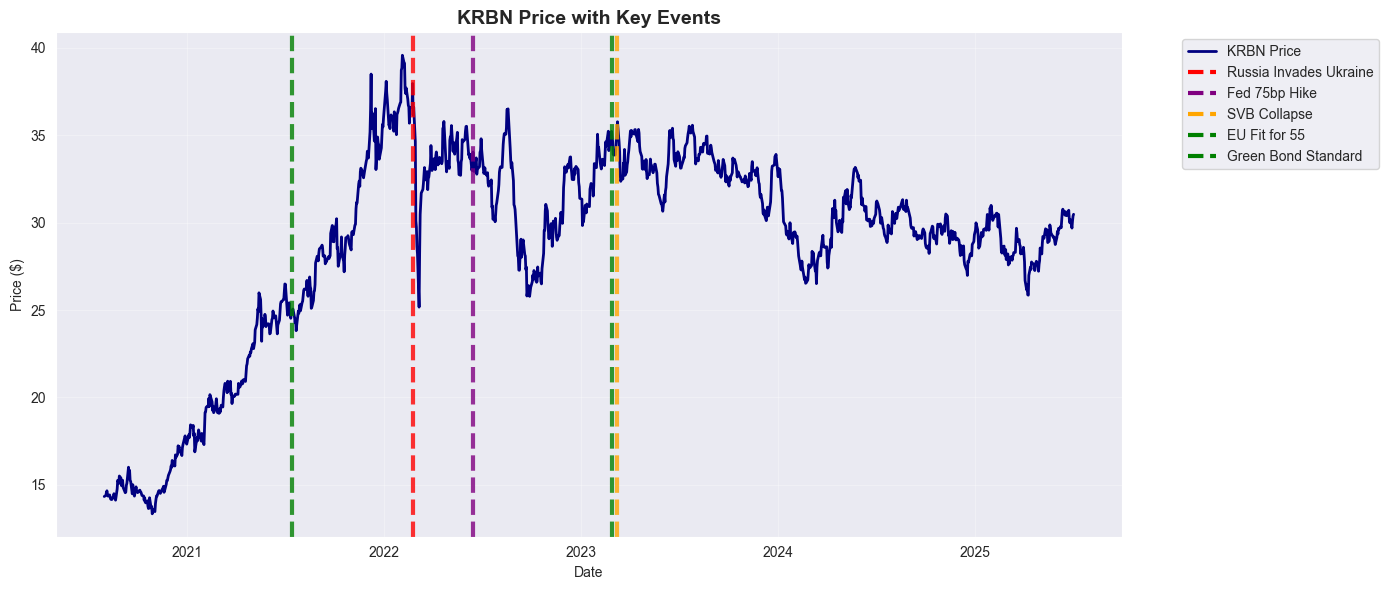

In [32]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(krbn.index, krbn[price_col], label='KRBN Price', color='navy', linewidth=2)

legend_handles = []
for date, label in zip(event_dates, event_labels):
    if date >= krbn.index[0] and date <= krbn.index[-1]:
        ax.axvline(date, color=event_colors[label], linestyle='--', linewidth=3, alpha=0.8)
        legend_handles.append(Line2D([0], [0], color=event_colors[label], linestyle='--', linewidth=3, label=f"{label}"))

ax.set_title("KRBN Price with Key Events", fontsize=14, fontweight='bold')
ax.set_ylabel("Price ($)")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)

ax.legend(handles=[Line2D([0], [0], color='navy', linewidth=2, label='KRBN Price')] + legend_handles,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plot_path_price = os.path.join(krbn_plots, 'krbn_price_with_events.png')
plt.savefig(plot_path_price)
print(f"Price plot saved to {plot_path_price}")

plt.tight_layout()
plt.show()

Volatility plot saved to plots\krbn\krbn_rolling_volatility_with_events.png


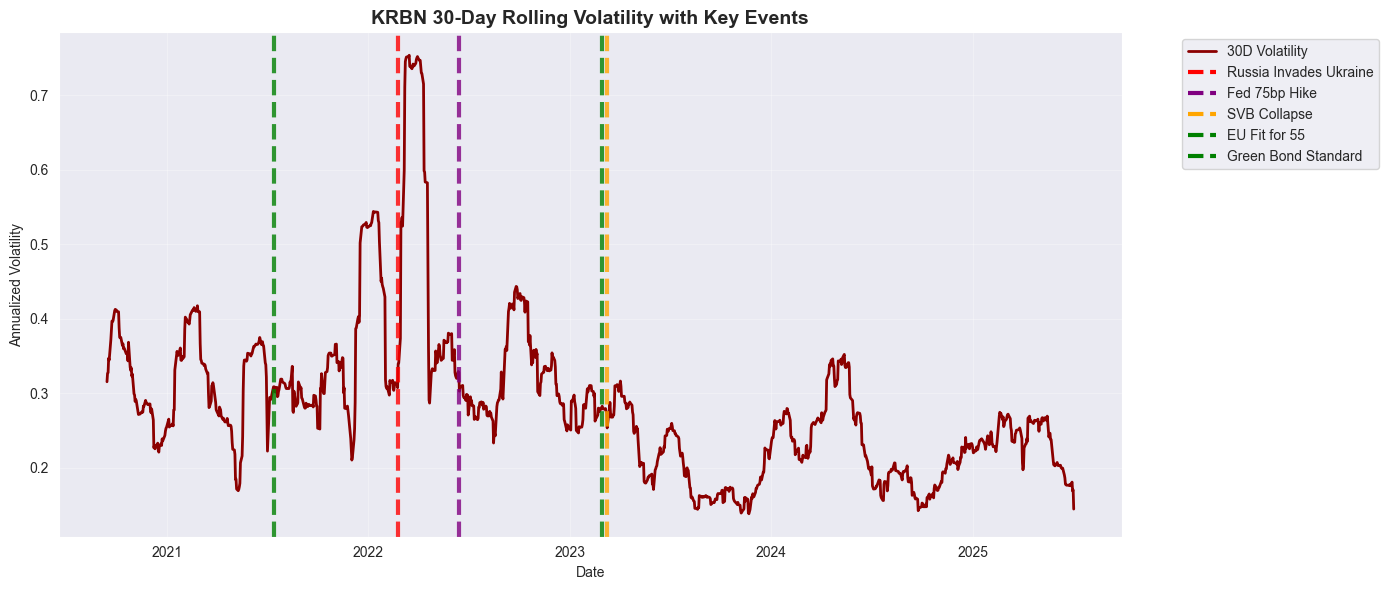

In [33]:
daily_returns = krbn[price_col].pct_change()
rolling_vol = daily_returns.rolling(30).std() * (252 ** 0.5)

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(krbn.index, rolling_vol, label='30D Volatility', color='darkred', linewidth=2)

legend_handles = []
for date, label in zip(event_dates, event_labels):
    if date >= krbn.index[0] and date <= krbn.index[-1]:
        ax.axvline(date, color=event_colors[label], linestyle='--', linewidth=3, alpha=0.8)
        legend_handles.append(Line2D([0], [0], color=event_colors[label], linestyle='--', linewidth=3, label=f"{label}"))

ax.set_title("KRBN 30-Day Rolling Volatility with Key Events", fontsize=14, fontweight='bold')
ax.set_ylabel("Annualized Volatility")
ax.set_xlabel("Date")
ax.grid(True, alpha=0.3)

ax.legend(handles=[Line2D([0], [0], color='darkred', linewidth=2, label='30D Volatility')] + legend_handles,
          bbox_to_anchor=(1.05, 1), loc='upper left')

plot_path_vol = os.path.join(krbn_plots, 'krbn_rolling_volatility_with_events.png')
plt.savefig(plot_path_vol)
print(f"Volatility plot saved to {plot_path_vol}")

plt.tight_layout()
plt.show()